In [1]:
import string
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords

### EXERCICI 1

El texto escogido es el extracto de un artículo de CNN Business, un sitio web de noticias e información financiera operado por CNN.  

El artículo de fecha 13 de marzo del 2023 titulado "‘Absolutely idiotic’. SVB insider says employees are angry with CEO", reporta el enfado de un empleado del Sillicon Valley Bank respecto al colapso del banco la semana pasada. Según él la culpa recae en la actidud del CEO Greg Becker.  

En este ejercicio nos proponemos averiguar que un algoritmo de análisis de sentimientos es capaz de analizar el texto y reportar el contenido claramente negativo del artículo.

El artículo ha sido copiado del siguiente enlace :
https://edition.cnn.com/2023/03/13/business/svb-employees-angry-at-ceo/index.html

### Texto a analizar

Absolutely idiotic. SVB insider says employees are angry with CEO. The blame game is on for who caused Silicon Valley Bank’s collapse, and the tech sector is pointing the finger at SVB CEO Greg Becker for allowing his company to go down in history as the second-biggest US banking failure on record. One Silicon Valley Bank employee, who requested anonymity to speak candidly, was dumbfounded by how Becker publicly acknowledged the extent of the bank’s financial troubles before privately lining up the necessary financial support to ride out the storm. This set the stage for the panic that ensued as customers scrambled to pull their money. That was absolutely idiotic,the employee, who works on the asset management side of Silicon Valley Bank, told CNN in an interview. They were being very transparent. It’s the exact opposite of what you’d normally see in a scandal. But their transparency and forthright-ness did them in.”Becker and his leadership team revealed last Wednesday night a hope (but no firm commitment) to raise USD2.25 billion in capital as well as USD21 billion in asset sales that sparked a USD1,8 billion loss. That news set off a wave of fear across Silicon Valley, where the bank serves as a key lender to tech startups. Many of them panicked, yanking USD42 billion last Thursday alone when Silicon Valley Bank’s stock crashed by 60%, according to filings by California regulators.


Cargamos los datos :

In [32]:
text = 'Absolutely idiotic. SVB insider says employees are angry with CEO. The blame game is on for who caused Silicon Valley Bank’s collapse, and the tech sector is pointing the finger at SVB CEO Greg Becker for allowing his company to go down in history as the second-biggest US banking failure on record. One Silicon Valley Bank employee, who requested anonymity to speak candidly, was dumbfounded by how Becker publicly acknowledged the extent of the bank’s financial troubles before privately lining up the necessary financial support to ride out the storm. This set the stage for the panic that ensued as customers scrambled to pull their money. That was absolutely idiotic,the employee, who works on the asset management side of Silicon Valley Bank, told CNN in an interview. They were being very transparent. It’s the exact opposite of what you’d normally see in a scandal. But their transparency and forthright-ness did them in. ”Becker and his leadership team revealed last Wednesday night a hope (but no firm commitment) to raise $2.25 billion in capital as well as $21 billion in asset sales that sparked a $1.8 billion loss. That news set off a wave of fear across Silicon Valley, where the bank serves as a key lender to tech startups. Many of them panicked, yanking $42 billion last Thursday alone when Silicon Valley Bank’s stock crashed by 60%, according to filings by California regulators.'

### Conversión a palabras

Convertimos el texto en palabras:

In [3]:
tokens = word_tokenize(text)

In [4]:
len(tokens)

270

La conversión nos devuelve una lista de 270 carácteres.

In [5]:
tokens[0:10]

['Absolutely',
 'idiotic',
 '.',
 'SVB',
 'insider',
 'says',
 'employees',
 'are',
 'angry',
 'with']

Para poder calcular la frecuencia de cada palabra, vamos a convertir todo el texto a minusculas e eliminar la puntuación :

In [6]:
# convertir a minúsculas
tokens = [w.lower() for w in tokens]
# prepare a regex para el filtrado de caracteres
re_punc = re.compile('[%s]' % re.escape(string.punctuation))
# eliminar la puntuación de cada palabra
stripped = [re_punc.sub('', w) for w in tokens]
# eliminar los tokens restantes que no estén en orden alfabético
words = [word for word in stripped if word.isalpha()]

In [7]:
print(words)

['absolutely', 'idiotic', 'svb', 'insider', 'says', 'employees', 'are', 'angry', 'with', 'ceo', 'the', 'blame', 'game', 'is', 'on', 'for', 'who', 'caused', 'silicon', 'valley', 'bank', 's', 'collapse', 'and', 'the', 'tech', 'sector', 'is', 'pointing', 'the', 'finger', 'at', 'svb', 'ceo', 'greg', 'becker', 'for', 'allowing', 'his', 'company', 'to', 'go', 'down', 'in', 'history', 'as', 'the', 'secondbiggest', 'us', 'banking', 'failure', 'on', 'record', 'one', 'silicon', 'valley', 'bank', 'employee', 'who', 'requested', 'anonymity', 'to', 'speak', 'candidly', 'was', 'dumbfounded', 'by', 'how', 'becker', 'publicly', 'acknowledged', 'the', 'extent', 'of', 'the', 'bank', 's', 'financial', 'troubles', 'before', 'privately', 'lining', 'up', 'the', 'necessary', 'financial', 'support', 'to', 'ride', 'out', 'the', 'storm', 'this', 'set', 'the', 'stage', 'for', 'the', 'panic', 'that', 'ensued', 'as', 'customers', 'scrambled', 'to', 'pull', 'their', 'money', 'that', 'was', 'absolutely', 'idiotic', 

In [8]:
len(words)

233

La conversión nos devuelve una lista de 233 palabras.

### Frecuencia de las palabras

In [9]:
from nltk.probability import FreqDist
fdist = FreqDist(words)
print(fdist)

<FreqDist with 147 samples and 233 outcomes>


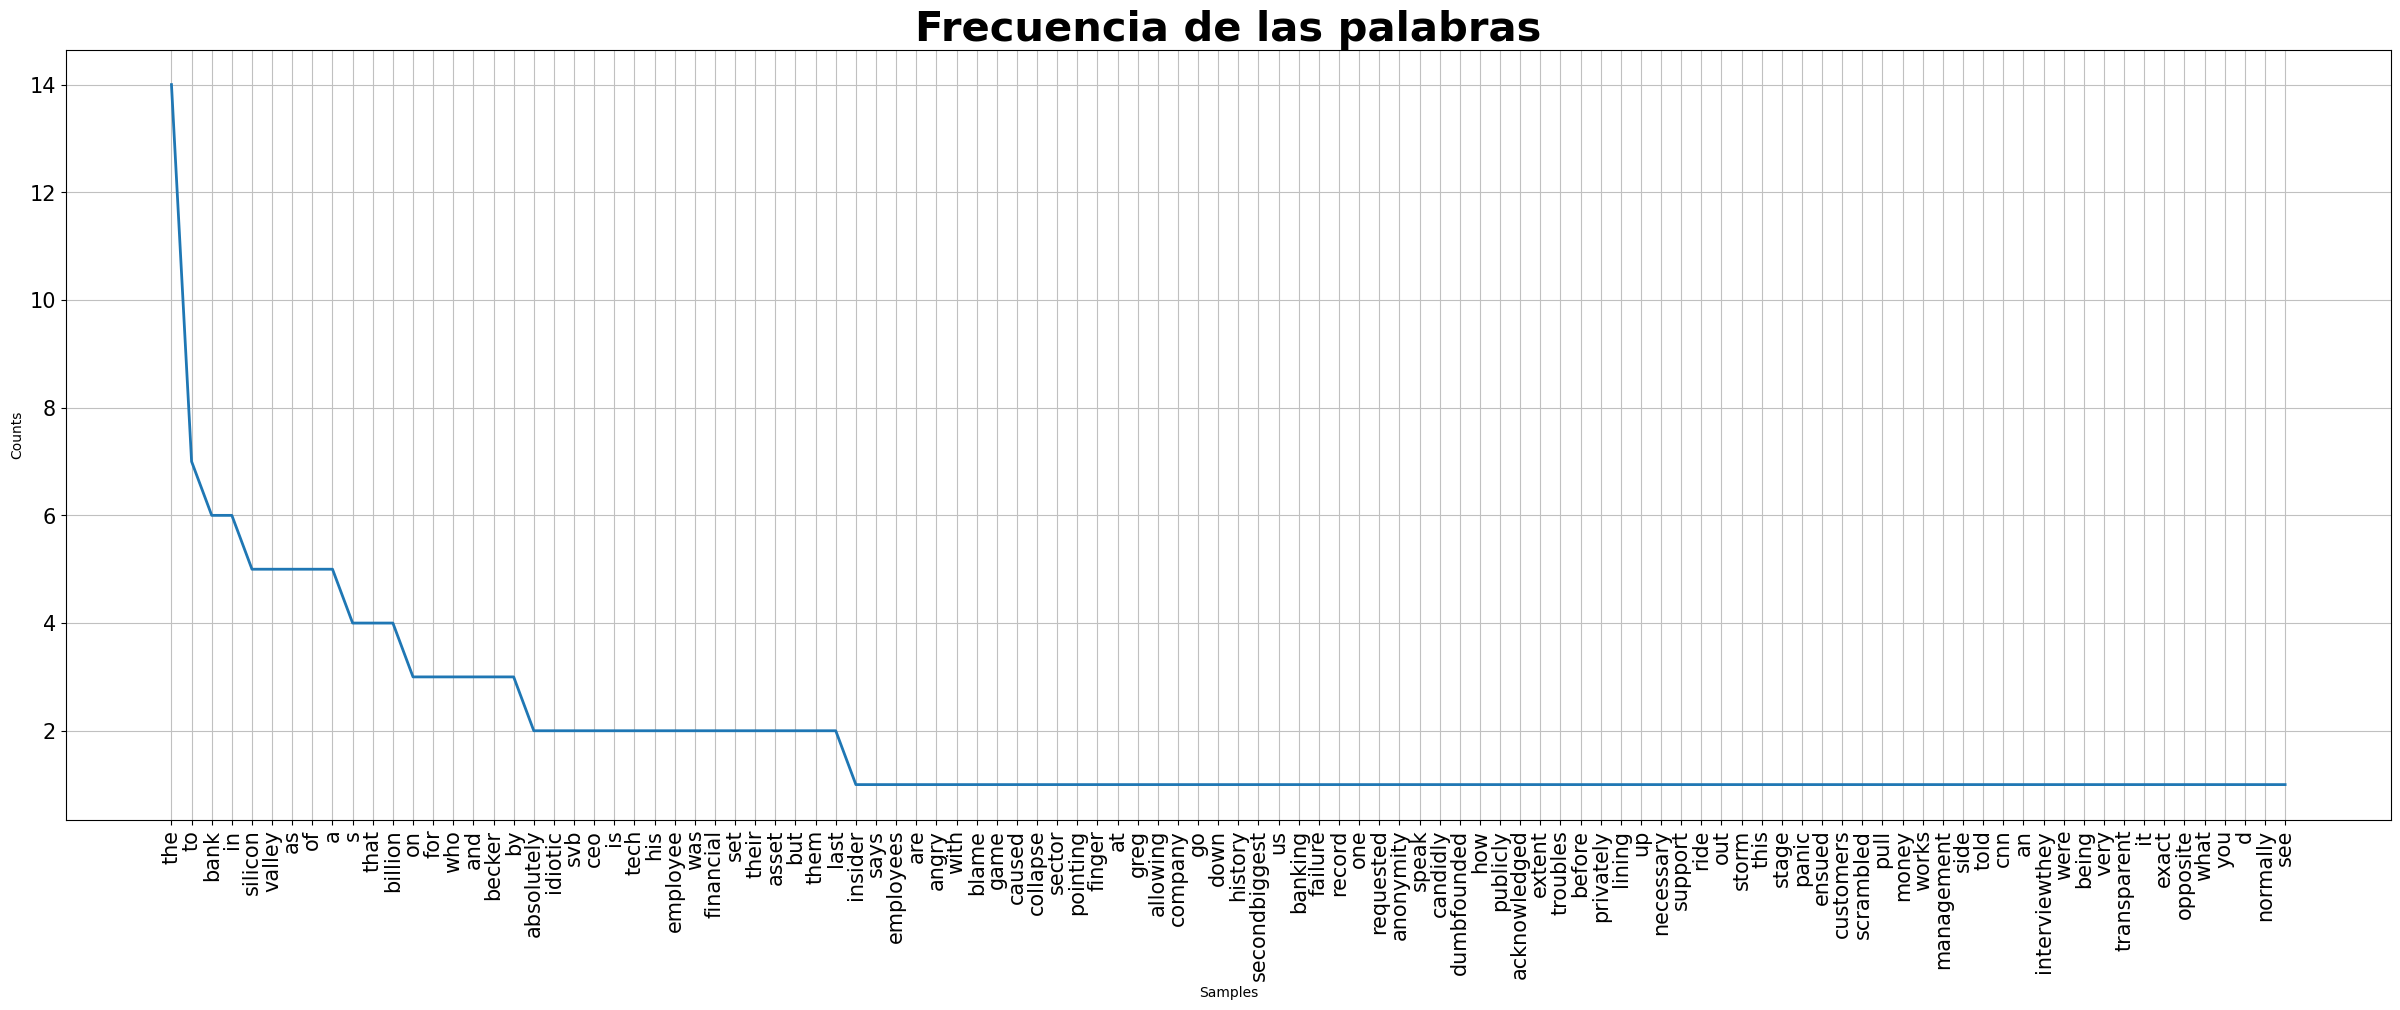

In [40]:
fig,axes=plt.subplots(figsize=(30,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Frecuencia de las palabras',fontweight='bold',fontsize=30)
fdist.plot(106,cumulative=False)

plt.show()

La frecuencia de las palabras es de 1, menos para la siguientes palabras :

In [11]:
print(fdist.most_common(34))

[('the', 14), ('to', 7), ('bank', 6), ('in', 6), ('silicon', 5), ('valley', 5), ('as', 5), ('of', 5), ('a', 5), ('s', 4), ('that', 4), ('billion', 4), ('on', 3), ('for', 3), ('who', 3), ('and', 3), ('becker', 3), ('by', 3), ('absolutely', 2), ('idiotic', 2), ('svb', 2), ('ceo', 2), ('is', 2), ('tech', 2), ('his', 2), ('employee', 2), ('was', 2), ('financial', 2), ('set', 2), ('their', 2), ('asset', 2), ('but', 2), ('them', 2), ('last', 2)]


La mayoría de la palabras más frecuentes son de interrupción (stopwords).

### EXERCICI 2

### Extraer stopwords

In [12]:
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
print(words)

['absolutely', 'idiotic', 'svb', 'insider', 'says', 'employees', 'angry', 'ceo', 'blame', 'game', 'caused', 'silicon', 'valley', 'bank', 'collapse', 'tech', 'sector', 'pointing', 'finger', 'svb', 'ceo', 'greg', 'becker', 'allowing', 'company', 'go', 'history', 'secondbiggest', 'us', 'banking', 'failure', 'record', 'one', 'silicon', 'valley', 'bank', 'employee', 'requested', 'anonymity', 'speak', 'candidly', 'dumbfounded', 'becker', 'publicly', 'acknowledged', 'extent', 'bank', 'financial', 'troubles', 'privately', 'lining', 'necessary', 'financial', 'support', 'ride', 'storm', 'set', 'stage', 'panic', 'ensued', 'customers', 'scrambled', 'pull', 'money', 'absolutely', 'idiotic', 'employee', 'works', 'asset', 'management', 'side', 'silicon', 'valley', 'bank', 'told', 'cnn', 'interviewthey', 'transparent', 'exact', 'opposite', 'normally', 'see', 'scandal', 'transparency', 'forthrightness', 'becker', 'leadership', 'team', 'revealed', 'last', 'wednesday', 'night', 'hope', 'firm', 'commitmen

In [13]:
len(words)

134

### Stemming

In [14]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
ps

<PorterStemmer>

In [15]:
stemmed_words=[]
for w in words:
    stemmed_words.append(ps.stem(w))
print(stemmed_words)

['absolut', 'idiot', 'svb', 'insid', 'say', 'employe', 'angri', 'ceo', 'blame', 'game', 'caus', 'silicon', 'valley', 'bank', 'collaps', 'tech', 'sector', 'point', 'finger', 'svb', 'ceo', 'greg', 'becker', 'allow', 'compani', 'go', 'histori', 'secondbiggest', 'us', 'bank', 'failur', 'record', 'one', 'silicon', 'valley', 'bank', 'employe', 'request', 'anonym', 'speak', 'candidli', 'dumbfound', 'becker', 'publicli', 'acknowledg', 'extent', 'bank', 'financi', 'troubl', 'privat', 'line', 'necessari', 'financi', 'support', 'ride', 'storm', 'set', 'stage', 'panic', 'ensu', 'custom', 'scrambl', 'pull', 'money', 'absolut', 'idiot', 'employe', 'work', 'asset', 'manag', 'side', 'silicon', 'valley', 'bank', 'told', 'cnn', 'interviewthey', 'transpar', 'exact', 'opposit', 'normal', 'see', 'scandal', 'transpar', 'forthright', 'becker', 'leadership', 'team', 'reveal', 'last', 'wednesday', 'night', 'hope', 'firm', 'commit', 'rais', 'billion', 'capit', 'well', 'billion', 'asset', 'sale', 'spark', 'billi

Volvemos a calcular la frecuencia de las palabras:

### Frecuencia de las palabras

In [16]:
stemmed_fdist = FreqDist(stemmed_words)
print(stemmed_fdist)

<FreqDist with 103 samples and 134 outcomes>


Con el proceso de transformación, la cantidad de palabras se ha reducido a 103 con 134 ocurrencias.

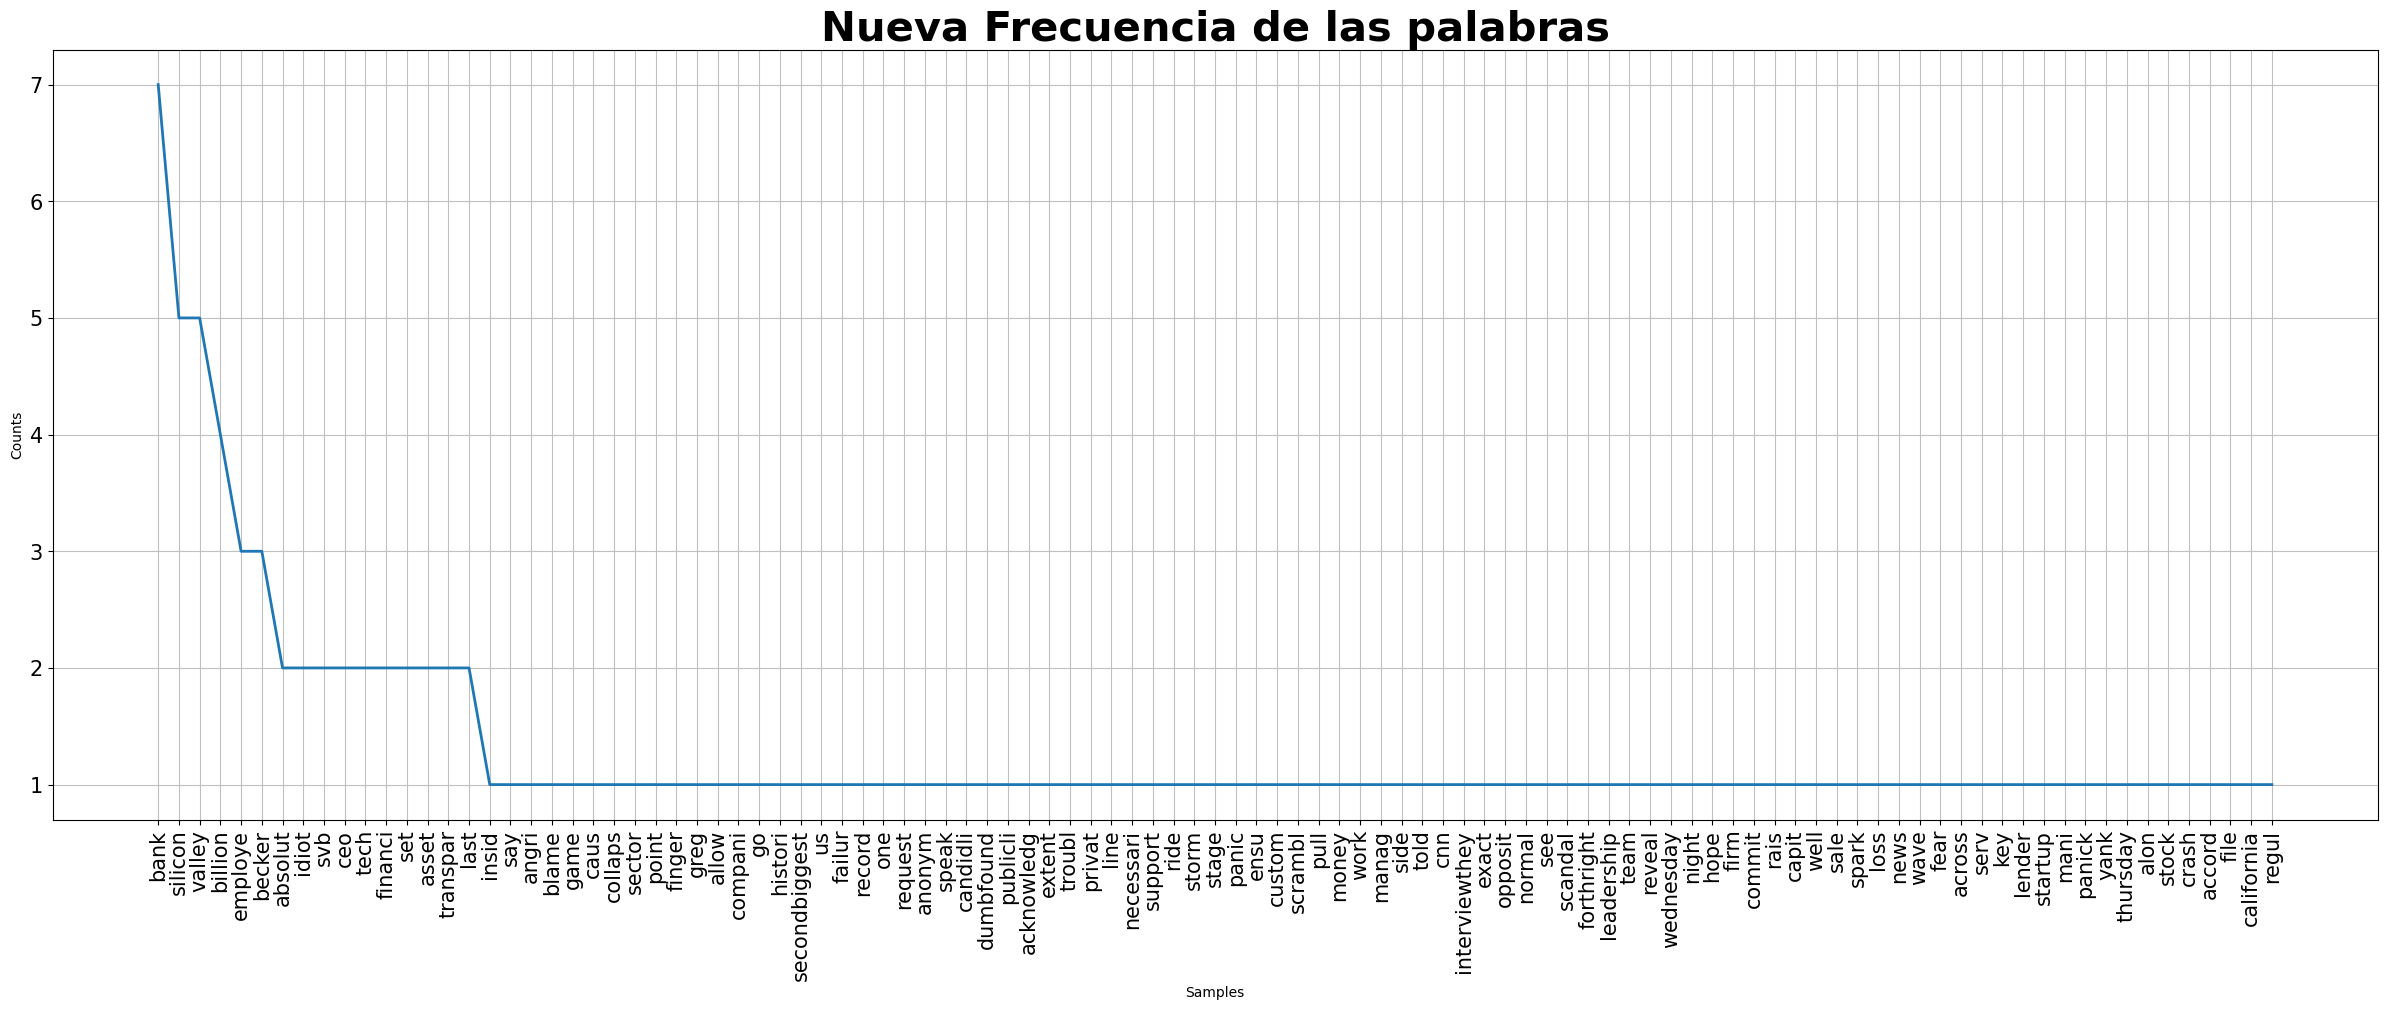

In [41]:
fig,axes=plt.subplots(figsize=(30,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Nueva Frecuencia de las palabras',fontweight='bold',fontsize=30)
stemmed_fdist.plot(106,cumulative=False)

plt.show()

In [18]:
print(stemmed_fdist.most_common(16))

[('bank', 7), ('silicon', 5), ('valley', 5), ('billion', 4), ('employe', 3), ('becker', 3), ('absolut', 2), ('idiot', 2), ('svb', 2), ('ceo', 2), ('tech', 2), ('financi', 2), ('set', 2), ('asset', 2), ('transpar', 2), ('last', 2)]


### EXERCICI 3

Vamos a realizar el análisis de sentimientos de nuestro texto. 

Para ello, decidimos usar un analizador de sentimiento de NTLK pre-entrenado llamado VADER (Valence Aware Dictionary and sEntiment Reasoner).

### Tokenizar el texto en frases

In [33]:
tokenized_sent=sent_tokenize(text)
print(tokenized_sent)

['Absolutely idiotic.', 'SVB insider says employees are angry with CEO.', 'The blame game is on for who caused Silicon Valley Bank’s collapse, and the tech sector is pointing the finger at SVB CEO Greg Becker for allowing his company to go down in history as the second-biggest US banking failure on record.', 'One Silicon Valley Bank employee, who requested anonymity to speak candidly, was dumbfounded by how Becker publicly acknowledged the extent of the bank’s financial troubles before privately lining up the necessary financial support to ride out the storm.', 'This set the stage for the panic that ensued as customers scrambled to pull their money.', 'That was absolutely idiotic,the employee, who works on the asset management side of Silicon Valley Bank, told CNN in an interview.', 'They were being very transparent.', 'It’s the exact opposite of what you’d normally see in a scandal.', 'But their transparency and forthright-ness did them in.', '”Becker and his leadership team revealed 

### Aplicamos el modelo VADER

In [34]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [35]:
for sentence in tokenized_sent:
    sid = SentimentIntensityAnalyzer()
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
        print()
    print()    

Absolutely idiotic.
compound: -0.5984, 
neg: 0.796, 
neu: 0.204, 
pos: 0.0, 

SVB insider says employees are angry with CEO.
compound: -0.5106, 
neg: 0.32, 
neu: 0.68, 
pos: 0.0, 

The blame game is on for who caused Silicon Valley Bank’s collapse, and the tech sector is pointing the finger at SVB CEO Greg Becker for allowing his company to go down in history as the second-biggest US banking failure on record.
compound: -0.836, 
neg: 0.186, 
neu: 0.814, 
pos: 0.0, 

One Silicon Valley Bank employee, who requested anonymity to speak candidly, was dumbfounded by how Becker publicly acknowledged the extent of the bank’s financial troubles before privately lining up the necessary financial support to ride out the storm.
compound: -0.4404, 
neg: 0.129, 
neu: 0.808, 
pos: 0.062, 

This set the stage for the panic that ensued as customers scrambled to pull their money.
compound: -0.5106, 
neg: 0.18, 
neu: 0.82, 
pos: 0.0, 

That was absolutely idiotic,the employee, who works on the asset mana

VADER devuelve para cada frase un diccionario con una puntuación de sentimiento del texto a analizar.  

Cada frase tiene una puntuación negativa, una puntuación neutral, una puntuación positiva y una puntuación compuesta. La puntuación compuesta es una evaluación ponderada de las tres primeras y varía de -1 a 1, siendo -1 un sentimiento totalmente negativo, y 1 totalmente positivo.



### Analisis de los resultados

In [36]:
df=pd.DataFrame(tokenized_sent)
df

,0
0,Absolutely idiotic.
1,SVB insider says employees are angry with CEO.
2,The blame game is on for who caused Silicon Va...
3,"One Silicon Valley Bank employee, who requeste..."
4,This set the stage for the panic that ensued a...
5,"That was absolutely idiotic,the employee, who ..."
6,They were being very transparent.
7,It’s the exact opposite of what you’d normally...
8,But their transparency and forthright-ness did...
9,”Becker and his leadership team revealed last ...


In [37]:
df.rename({0:'sentence' },axis=1,inplace=True)
df

,sentence
0,Absolutely idiotic.
1,SVB insider says employees are angry with CEO.
2,The blame game is on for who caused Silicon Va...
3,"One Silicon Valley Bank employee, who requeste..."
4,This set the stage for the panic that ensued a...
5,"That was absolutely idiotic,the employee, who ..."
6,They were being very transparent.
7,It’s the exact opposite of what you’d normally...
8,But their transparency and forthright-ness did...
9,”Becker and his leadership team revealed last ...


In [38]:
analyzer = SentimentIntensityAnalyzer()
df['compound'] = [analyzer.polarity_scores(x)['compound'] for x in df['sentence']]
df['neg'] = [analyzer.polarity_scores(x)['neg'] for x in df['sentence']]
df['neu'] = [analyzer.polarity_scores(x)['neu'] for x in df['sentence']]
df['pos'] = [analyzer.polarity_scores(x)['pos'] for x in df['sentence']]

In [39]:
df

,sentence,compound,neg,neu,pos
0,Absolutely idiotic.,-0.5984,0.796,0.204,0.000
1,SVB insider says employees are angry with CEO.,-0.5106,0.320,0.680,0.000
2,The blame game is on for who caused Silicon Va...,-0.8360,0.186,0.814,0.000
3,"One Silicon Valley Bank employee, who requeste...",-0.4404,0.129,0.808,0.062
4,This set the stage for the panic that ensued a...,-0.5106,0.180,0.820,0.000
5,"That was absolutely idiotic,the employee, who ...",0.3612,0.000,0.889,0.111
6,They were being very transparent.,0.0000,0.000,1.000,0.000
7,It’s the exact opposite of what you’d normally...,-0.4404,0.225,0.775,0.000
8,But their transparency and forthright-ness did...,0.0000,0.000,1.000,0.000
9,”Becker and his leadership team revealed last ...,0.4588,0.113,0.700,0.188


Como podemos observar, VADER nos devuelve una valoración sustancialmente negativa para 8 de las 12 frases analizadas, lo cual está alineado con el enfoque del artículo. Veamos si alguna frase recibe una puntuación que parece no ser adecuada :

That was absolutely idiotic,the employee, who works on the asset management side of Silicon Valley Bank, told CNN in an interview.  
compound: 0.3612,   
neg: 0.0,   
neu: 0.889,   
pos: 0.111,  

En este caso, no se entiende que la valoración sea positiva, y más si tenemos en cuenta que el título del artículo "Absolutely idiotic" recibe una puntuación muy negativa. Hay que tener en cuenta que VADER es un modelo que se adapta mejor al lenguaje usado en redes sociales, con frases cortas, y no es tan adaptado para frases largas y estructuradas. Este caso es un buen ejemplo de ello.

